In [1]:
import numpy as np

import algorithms
import functions
from optSolver import optSolver

In [2]:
import scipy.io
quad2 = scipy.io.loadmat('Data/quadratic2.mat')
quad10 = scipy.io.loadmat("Data/quadratic10.mat")

def get_f_star(quad):
    A = quad["A"]
    b = quad["b"].flatten()
    c = quad["c"].flatten()[0]
    x = quad["x_star"].flatten()
    return 0.5 * x.T @ A @ x + b.T @ x + c

In [3]:
A = quad2["A"]
b = quad2["b"].flatten()
c = quad2["c"].flatten()[0]
x = quad2["x_star"].flatten()
print(0.5 * x.T @ A @ x + b.T @ x + c)

-1.0268510983810564


In [4]:
# Call a certain function in functions.py as follows
x0 = np.array([1.2, 1.2])
functions.rosen_func(x0)

5.8

In [5]:
# Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self, name, x0, n=None, A=None, b=None, c=None):
        self.name = name
        self.x0 = x0
        self.n = len(x0)
        match name:
            case "Rosenbrock":
                self.compute_f = functions.rosen_func
                self.compute_g = functions.rosen_grad
                self.compute_H = functions.rosen_Hess
            case "Quadratic": 
                # Lambda function so I only need to pass x
                self.compute_f = lambda x: functions.quad_func(x, A, b, c)
                self.compute_g = lambda x: functions.quad_grad(x, A, b, c)
                self.compute_H = lambda x: functions.quad_Hess(x, A, b, c)
            case _:
                raise ValueError("problem not defined!!!")
        
class Method:
    def __init__(self, name, **options):
        self.name = name
        self.options = options
        
class Options:
    def __init__(self,term_tol=1e-6, max_iterations=1e2):
        self.term_tol = term_tol
        self.max_iterations = max_iterations  

In [6]:
# Instantiate an object in the class as follows:
x0 = np.array([1.2, 1.2])
problem = Problem('Rosenbrock', x0=x0)
method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-3)
options = Options(term_tol=1e-6, max_iterations=1e3) # if using options = Options(), term_tol and max_iterations will set to be default values

In [7]:
# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)

# Test cases

In [8]:
# Rosenbrock GD constant

# Instantiate an object in the class as follows:
x0 = np.array([1.2, 1.2])
problem = Problem('Rosenbrock', x0=x0)

method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-3)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)
print("Rosen GD const")
print(f"x = {x}")
print(f"f = {f}")


# Rosenbrock GD backtracking

# Instantiate an object in the class as follows:
method = Method('GradientDescent', step_type='Backtracking', alpha=1, tau=0.5, c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)

print("Rosen GD Back")
print(f"x = {x}")
print(f"f = {f}")

# Rosenbrock Newton backtracking

# Instantiate an object in the class as follows:
method = Method('Newton', step_type='Backtracking', alpha=1, tau=0.5, c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)

print("Rosen Newton Back")
print(f"x = {x}")
print(f"f = {f}")


Rosen GD const
x = [1.10770226 1.22740826]
f = 0.01161609568263978
Rosen GD Back
x = [1.10011418 1.21052449]
f = 0.010030317334716779
Rosen Newton Back
x = [1.00000018 1.00000035]
f = 3.2266754669730377e-14


In [9]:
# Quad GD constant

# Instantiate an object in the class as follows:
x0 = quad2["x_0"].flatten()
problem = Problem('Quadratic', x0=x0, A = quad2["A"], b = quad2["b"].flatten(), c = quad2["c"].flatten()[0])

method = Method('GradientDescent', step_type='Constant', constant_step_size=1e-3)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)
print("Quad GD const")
print(f"x = {x}")
print(f"f = {f}")


# Quad GD backtracking

# Instantiate an object in the class as follows:
method = Method('GradientDescent', step_type='Backtracking', alpha=1, tau=0.5, c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)

print("Quad GD Back")
print(f"x = {x}")
print(f"f = {f}")

# Quad Newton backtracking

# Instantiate an object in the class as follows:
method = Method('Newton', step_type='Backtracking', alpha=1, tau=0.5, c1=1e-4)
options = Options(term_tol=1e-6, max_iterations=1e2) # if using options = Options(), term_tol and max_iterations will set to be default values

# Implement the algorithm on a problem 
x, f, _ = optSolver(problem, method, options)

print("Quad Newton Back")
print(f"x = {x}")
print(f"f = {f}")

print("x* = {}".format(quad2['x_star'].flatten()))


Quad GD const
x = [0.02052967 0.05727891]
f = -0.33078494204979075
Quad GD Back
x = [-1.59726233  3.09862792]
f = -1.0268510979621737
Quad Newton Back
x = [-1.5973161   3.09870199]
f = -1.0268510983810564
x* = [-1.5973161   3.09870199]


# Plots

c:\Users\hvand\OneDrive - Umich\Documents\UMICH\W25\Math 562\framework_PYTHON\functions.py:20: RuntimeWarning: overflow encountered in scalar power
  return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2
c:\Users\hvand\OneDrive - Umich\Documents\UMICH\W25\Math 562\framework_PYTHON\functions.py:32: RuntimeWarning: overflow encountered in scalar multiply
  grad[0] = -2 + 2*x[0] - 400*x[0]*x[1] + 400*x[0]**3
c:\Users\hvand\OneDrive - Umich\Documents\UMICH\W25\Math 562\framework_PYTHON\functions.py:32: RuntimeWarning: overflow encountered in scalar power
  grad[0] = -2 + 2*x[0] - 400*x[0]*x[1] + 400*x[0]**3
c:\Users\hvand\OneDrive - Umich\Documents\UMICH\W25\Math 562\framework_PYTHON\functions.py:32: RuntimeWarning: invalid value encountered in scalar add
  grad[0] = -2 + 2*x[0] - 400*x[0]*x[1] + 400*x[0]**3
c:\Users\hvand\OneDrive - Umich\Documents\UMICH\W25\Math 562\framework_PYTHON\functions.py:33: RuntimeWarning: overflow encountered in scalar power
  grad[1] = 200*(x[1] - x[0]**2)


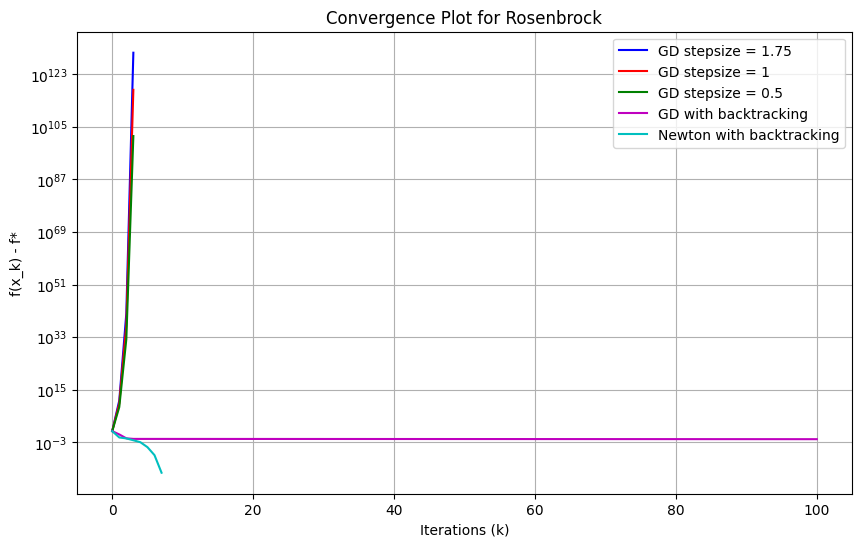

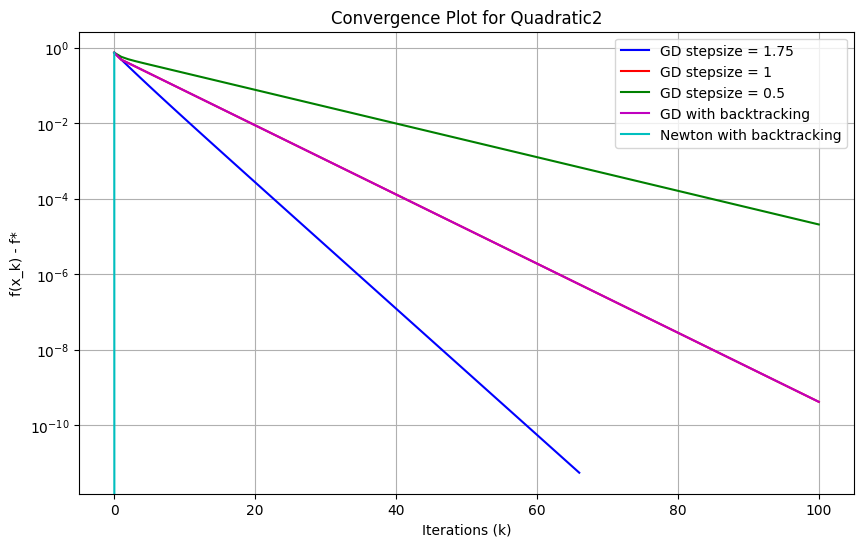

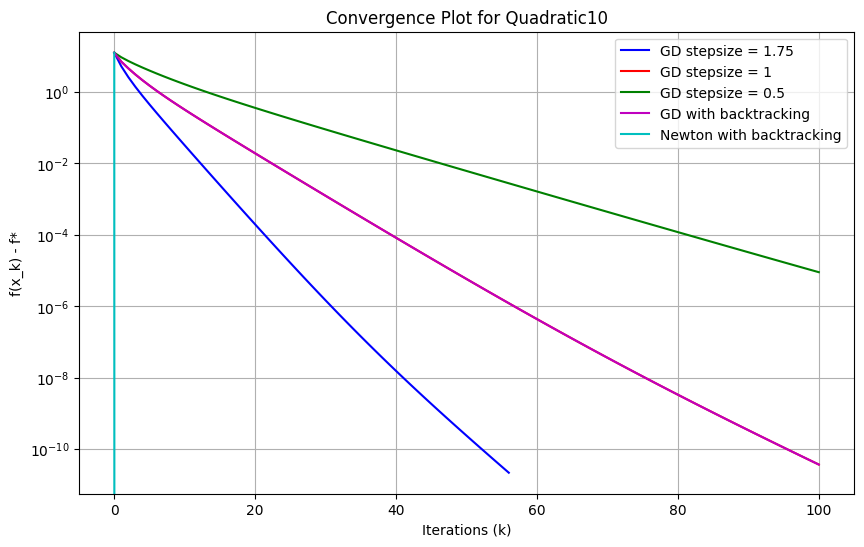

In [10]:
# Example usage to create the plots:
def plot_convergence(problems, methods, options, f_star):
    """
    Create convergence plots for different methods
    
    Args:
        problems: List of problem instances
        methods: List of method instances
        options: Options instance
        f_star: Dictionary mapping problem names to optimal function values
    """
    import matplotlib.pyplot as plt
    
    colors = ['b', 'r', 'g', 'm', 'c']  # Different colors for different methods

    for i in range(3):
        plt.figure(figsize=(10, 6))
        if i==0:
            plt.title(f'Convergence Plot for {problems[i].name}')
        if i==1:
            plt.title(f'Convergence Plot for {problems[i].name}2')
        if i==2:
            plt.title(f'Convergence Plot for {problems[i].name}10')
        
        for j, method in enumerate(methods):
            # Get data
            _, _, f_hist = optSolver(problems[i], method, options)
            iterations = np.arange(len(f_hist))
            # Get f - f*
            optimality_gap = f_hist - f_star[i]
            
            if method.name == "GradientDescent" and methods[j].options["step_type"] == "Constant":
                label = f'GD stepsize = {methods[j].options["constant_step_size"]}'
            elif method.name == "GradientDescent":
                label = f'GD with backtracking'
            else:
                label = f'Newton with backtracking'
                
            plt.semilogy(iterations, optimality_gap, 
                        color=colors[j % len(colors)],
                        label=label)
        
        plt.xlabel('Iterations (k)')
        plt.ylabel('f(x_k) - f*')
        plt.grid(True)
        plt.legend()
        plt.show()
    




# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Constant", constant_step_size=1.75),
    Method("GradientDescent", step_type="Constant", constant_step_size=1),
    Method("GradientDescent", step_type="Constant", constant_step_size=0.5),
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4)
]

# Init problems
# Instantiate an object in the class as follows:
x0 = np.array([1.2, 1.2])
rosen_problem = Problem('Rosenbrock', x0=x0)

# Instantiate an object in the class as follows:
quad2_problem = Problem('Quadratic', x0=quad2["x_0"].flatten(), A = quad2["A"], b = quad2["b"].flatten(), c = quad2["c"].flatten()[0])

# Instantiate an object in the class as follows:
quad10_problem = Problem('Quadratic', x0=quad10["x_0"].flatten(), A = quad10["A"], b = quad10["b"].flatten(), c = quad10["c"].flatten()[0])

# Array of correct values
f_star = [0, get_f_star(quad2), get_f_star(quad10)]

plot_convergence([rosen_problem, quad2_problem, quad10_problem], methods, options, f_star)

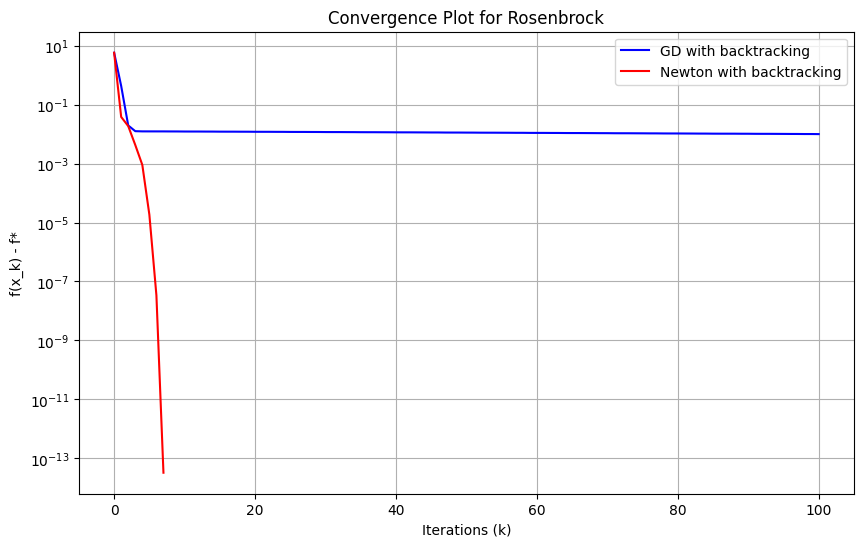

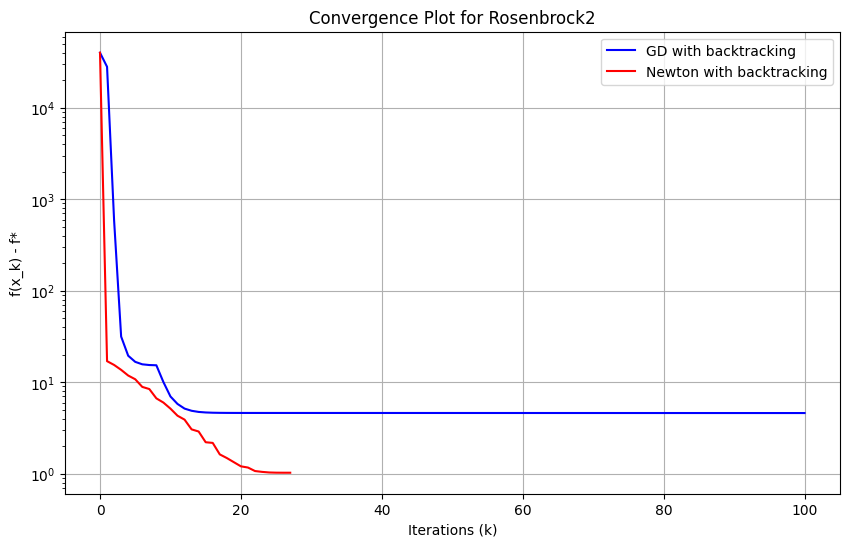

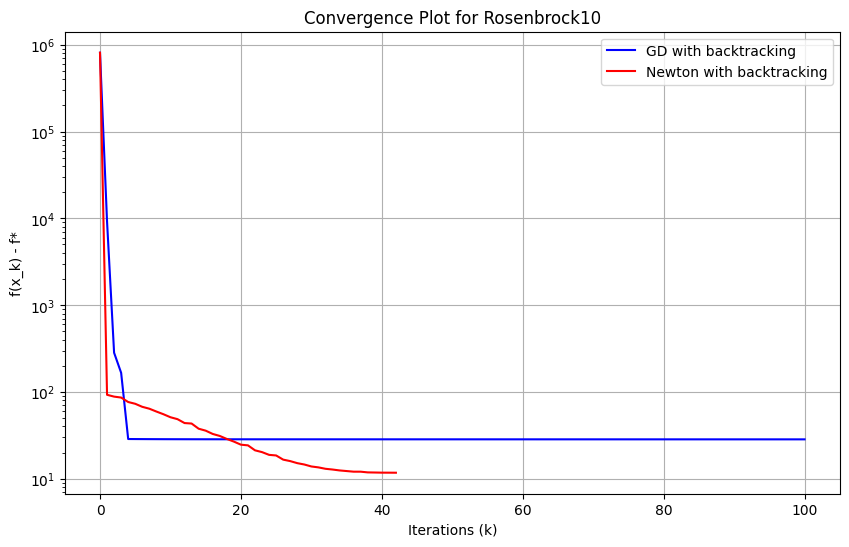

In [11]:
# Rosen starting points
# Create different methods including GD with different step sizes
methods = [
    Method("GradientDescent", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4),
    Method("Newton", step_type="Backtracking", alpha=1, tau=0.5, c1=1e-4)
]

# Init problems
# Instantiate an object in the class as follows:
x0 = np.array([1.2, 1.2])
rosen_problem1 = Problem('Rosenbrock', x0=x0)
x0 = np.array([5, 5])
rosen_problem2 = Problem('Rosenbrock', x0=x0)
x0 = np.array([10, 10])
rosen_problem3 = Problem('Rosenbrock', x0=x0)

# Array of correct values
f_star = [0, get_f_star(quad2), get_f_star(quad10)]

plot_convergence([rosen_problem1, rosen_problem2, rosen_problem3], methods, options, f_star)